In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
# Load .pt files
test_path = "c:\\Users\\magnu\\Documents\\GitHub Projects\\dtu_mlops\\data\\corruptmnist\\test_images.pt"
test_images = torch.load(test_path)

train_path = "c:\\Users\\magnu\\Documents\\GitHub Projects\\dtu_mlops\\data\\corruptmnist\\train_images_0.pt"
train_images = torch.load(train_path)

In [ ]:
# Dataset shape
print("Test dataset shape:", test_images.shape)
print("Train dataset shape:", train_images.shape)

In [ ]:
# Display the first image
plt.imshow(train_images[5], cmap='gray')
plt.show()

In [ ]:
train_images = []
for i in range(6):
    train_path = f"c:\\Users\\magnu\\Documents\\GitHub Projects\\dtu_mlops\\data\\corruptmnist\\train_images_{i}.pt"
    train_file = torch.load(train_path)
    train_images.append(train_file)
train_images = torch.cat(train_images, dim=0)
trainloader = torch.utils.data.DataLoader(train_images, batch_size=64, shuffle=True)

test_path = f"c:\\Users\\magnu\\Documents\\GitHub Projects\\dtu_mlops\\data\\corruptmnist\\test_images.pt"
test_file = torch.load(test_path)
testloader = torch.utils.data.DataLoader(test_file, batch_size=64, shuffle=True)

In [ ]:
from data import mnist

def evaluate(model_checkpoint):
    """Evaluate a trained model."""

    from_file = False
    if type(model_checkpoint) == str:
        model = torch.load(model_checkpoint)
        from_file = True
    else:
        model = model_checkpoint

    _, test_set = mnist()
    all_equals = []
    for images, labels in test_set:
        images = images.unsqueeze(1)
        output = model(images)
        top_p, top_class = output.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        all_equals.append(equals)

    all_equals = torch.cat(all_equals)
    accuracy = torch.mean(all_equals.type(torch.FloatTensor))
    if from_file:
        print(f'Accuracy: {accuracy.item()*100}%')
    return accuracy.item()

model = torch.load("model.pt")
evaluate(model)

Training loss: 1.6566845686959306


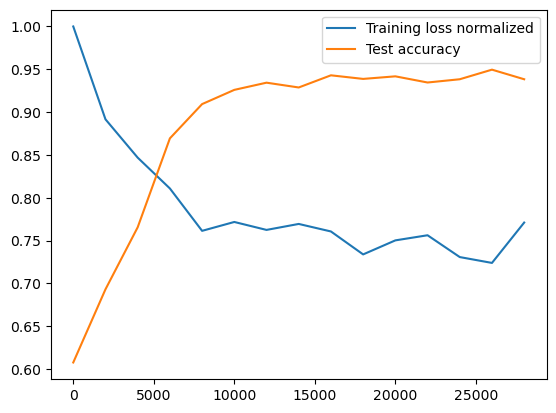

In [1]:
from main import train

train(1e-3, 256, 2000, 1)